In [10]:
import pandas as pd
df = pd.read_csv("df_combine.csv")
df["date"] = pd.to_datetime(df["date"] )
df.set_index('date', inplace=True)

In [11]:
#移除object的欄位
df_dtypes = pd.DataFrame(df.dtypes)
df_dtypes.reset_index(drop=False,inplace=True)
df_dtypes.rename(columns={"index":"colnames",0:"type"},inplace=True)

In [12]:
col_select = list(df_dtypes.loc[df_dtypes["type"]!="object","colnames"])
df = df[col_select] 

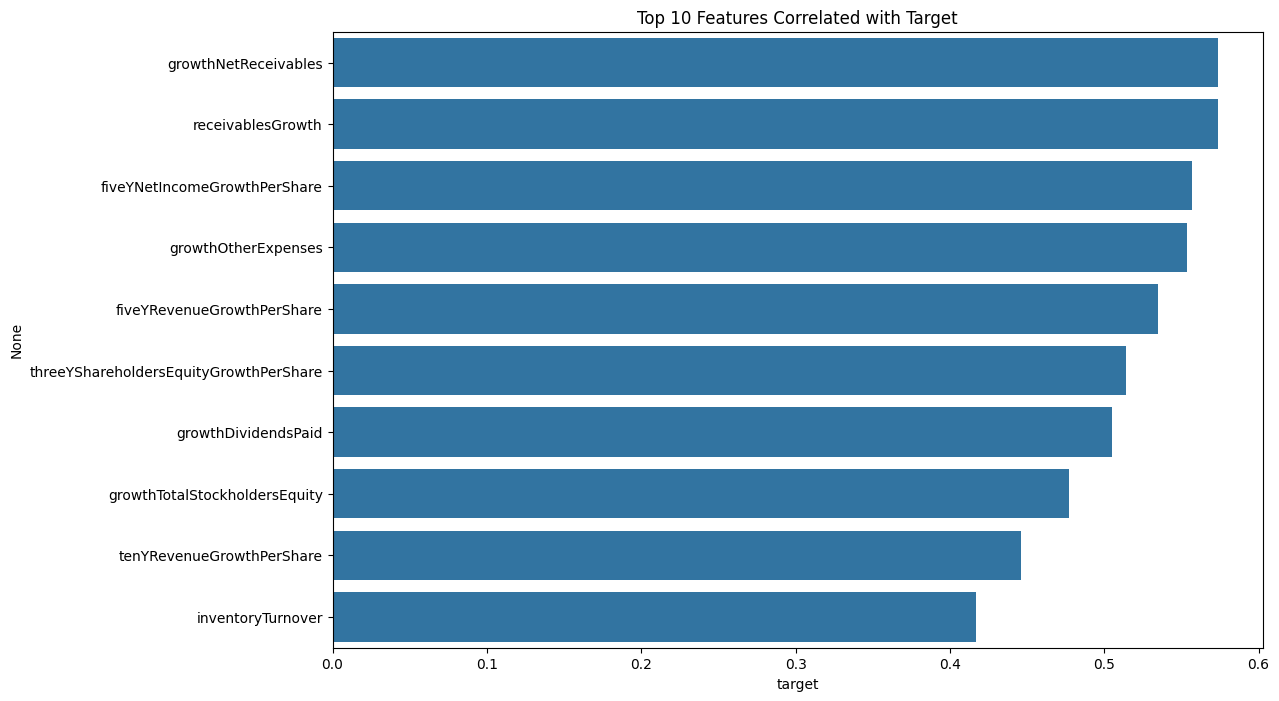

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算與目標變數的相關性
correlation_matrix = df.corr()
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

# 選擇與目標變數相關性最高的前15個變數
top_features = target_correlation.index[1:11]

# 可視化相關性
plt.figure(figsize=(12, 8))
sns.barplot(x=target_correlation[top_features], y=top_features)
plt.title('Top 10 Features Correlated with Target')
plt.show()


In [7]:
df.dropna(inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 選擇相關性高的變數
selected_features = top_features

# 準備特徵以及目標 X為特徵變數矩陣 y為我們的目標(90天後的價格是否有超過10%)
X = df[selected_features]
y = df['target']

# 分割訓練和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化特徵變數
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 訓練LogisticRegression模型
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估模型
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.76      0.86       111
           1       0.40      0.95      0.56        19

    accuracy                           0.78       130
   macro avg       0.69      0.85      0.71       130
weighted avg       0.90      0.78      0.81       130



d:\0605interview\0605ineterview\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [9]:
# 列出模型的係數
coefficients = model.coef_
feature_names = X.columns
coef_df = pd.DataFrame(coefficients, columns=feature_names)
print("Model Coefficients:")
print(coef_df)

Model Coefficients:
   growthNetReceivables  receivablesGrowth  fiveYNetIncomeGrowthPerShare  \
0             -0.428058          -0.428058                      1.246223   

   growthOtherExpenses  fiveYRevenueGrowthPerShare  \
0             0.679699                    1.873826   

   threeYShareholdersEquityGrowthPerShare  growthDividendsPaid  \
0                                  0.8512             0.916389   

   growthTotalStockholdersEquity  tenYRevenueGrowthPerShare  inventoryTurnover  
0                       0.677385                   1.311343          -0.132726  
